# Deep Neural Networks 
## Lecture 08

## Implementation of Perceptron using PyTorch


## 1. Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import StandardScaler

#changes for PyTorch ----------------------------------
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable 
#----------------------------------------
%matplotlib inline

## 2. Setup Global Parameters

In [2]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 23 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 5001  # number of epochs
ALPHA = 0.001  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = 'coolwarm'

## 3. Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:white;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [3]:
data = pd.read_csv('fifa_2019.csv')

In [4]:
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [5]:
for col in data.columns:
    print(f'{col}: {data[col].unique()}')

Unnamed: 0: [    0     1     2 ... 18204 18205 18206]
ID: [158023  20801 190871 ... 241638 246268 246269]
Name: ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Age: [31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]
Photo: ['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']
Nationality: ['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' 'Switze

In [6]:
data = data[data['Position'].notnull()]
data.shape

(18147, 89)

In [7]:
#data.columns

In [8]:
rel_columns = ['Position','Finishing','HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [9]:
data = data[rel_columns]
data.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [10]:
#checking the null values
#data.isna().sum()

In [11]:
data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [12]:
goalkeeper = 'GK'

forward = ['ST', 'LW', 'RW', 'LF', 'RF', 'RS', 'LS', 'CF']

midfielders = ['CM', 'RCM', 'LCM', 'CDM', 'RDM', 'LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']

defence = ['CB', 'RCB', 'LCB', 'LWB', 'RWB', 'LB', 'RB']

In [13]:
data.loc[data['Position'] == 'GK', 'Position'] = 0

data.loc[data['Position'].isin(defence) ,     'Position'] = 1

data.loc[data['Position'].isin(midfielders) , 'Position'] = 2

data.loc[data['Position'].isin(forward) ,     'Position'] = 3

data['Position'] = pd.to_numeric(data['Position'], downcast='integer')

In [14]:
labels = {0:'Goal Keeper',1:"Defence",2:"Mid-fielders",3:"Forward"}

In [15]:
X = data.drop('Position',axis =1)
y = data['Position']
X.shape,y.shape

((18147, 33), (18147,))

In [16]:
y = pd.get_dummies(y)
y.shape

(18147, 4)

In [17]:
y

,0,1,2,3
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
18202,False,False,True,False
18203,False,False,False,True
18204,False,False,False,True
18205,False,False,False,True


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,
                                                 stratify=y,random_state=RANDOM_STATE)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14517, 33), (3630, 33), (14517, 4), (3630, 4))

### Scaling 

In [19]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) #train
X_test  =scaler.transform(X_test) #test


y_train = y_train.to_numpy() #array
y_test = y_test.to_numpy() #convert to array

In [20]:
### Prepare Model

In [21]:
torch.version.cuda

'12.1'

Checking the GPU

In [22]:
#torch.cuda.current_device()

In [23]:
#torch.cuda.get_device_name(torch.cuda.current_device())

In [24]:
#This line is the must
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## MODEL

In [25]:
# class Model(nn.Module):
#     def __init__(self,input_dim):
#         super(Model,self).__init__()
#         self.layer1 = nn.Linear(input_dim,18)
#         self.layer2 = nn.Linear(18,4)
#     def forward(self,x):
#         x = F.tanh(self.layer1(x) )   # layer 1
        
#         x = F.softmax(self.layer2(x),dim=1)  # layer 2
#         return x

In [26]:
# model = Model(X_train.shape[1]).to(device)
# model

In [27]:
# This part is an Alternative for above commented Code i.e class Model(nn.Module):

model = nn.Sequential(
    nn.Linear(33, 18),
    nn.Tanh(),
    nn.Linear(18,4),
    nn.Softmax(dim=1)
)

In [28]:
list(model.parameters())

[Parameter containing:
 tensor([[-5.5973e-02, -1.2855e-01, -1.0262e-01, -1.8691e-02,  4.3030e-02,
          -6.2776e-02,  1.0139e-01, -7.7028e-02, -8.9483e-02,  1.0209e-01,
          -7.4340e-02,  1.5638e-01, -8.7658e-03,  1.0780e-01, -1.1926e-01,
           9.3071e-02,  1.2416e-01,  1.1996e-01,  8.0152e-02,  1.4100e-01,
          -2.7027e-02, -2.8088e-02,  1.5632e-01, -1.4613e-01,  4.8899e-02,
          -3.5339e-02, -9.5220e-02,  1.4913e-01,  4.1489e-02,  1.2130e-01,
          -1.3341e-01,  8.7437e-02,  1.3875e-02],
         [-1.1076e-01, -1.4275e-01, -1.2006e-01,  1.2591e-01, -6.5498e-03,
           1.1082e-01, -1.0290e-01, -1.3837e-01,  1.6383e-01,  4.2015e-02,
          -4.2053e-02, -3.8391e-02,  1.0270e-01, -1.5949e-01,  3.6183e-02,
          -1.1807e-01, -2.1744e-02, -6.6634e-02, -9.5346e-02,  9.0530e-02,
          -5.7079e-02,  1.2654e-01, -3.5916e-02, -1.3156e-01, -1.1505e-02,
           1.4185e-01, -1.0037e-01,  2.2177e-02,  6.0075e-03,  4.1767e-02,
           4.1458e-04,  7.7

In [29]:
print(f'Numer of Parameter : {len(list(model.parameters()))}')

Numer of Parameter : 4


In [30]:
print(f'Layer 1 Weights :  {list(model.parameters())[0].shape}')
print(f'Layer 1 Bias :     {list(model.parameters())[1].shape}')
print(f'Layer 2 Weights :  {list(model.parameters())[2].shape}')
print(f'Layer 2 Bias :     {list(model.parameters())[3].shape}')

Layer 1 Weights :  torch.Size([18, 33])
Layer 1 Bias :     torch.Size([18])
Layer 2 Weights :  torch.Size([4, 18])
Layer 2 Bias :     torch.Size([4])


In [31]:
## Matrix converted into TENSOR 

train_X  =Variable(torch.Tensor(X_train)).to(device)
train_y  =Variable(torch.Tensor(y_train)).to(device)
test_X  =Variable(torch.Tensor(X_test)).to(device)
test_y  =Variable(torch.Tensor(y_test)).to(device)

In [32]:
train_y

tensor([[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]])

### Loss Function

In [33]:
loss_fn = nn.CrossEntropyLoss()

loss=[]
tloss=[]
n_epoch=[]
acc=[]
tacc=[]

optimizer = torch.optim.Adam(model.parameters(),lr=ALPHA)  #Optimizer

# Iterations
for epoch in range(EPOCHS):
    model.train()    #Set the model
    predict_prob = model(train_X)
    curr_loss = loss_fn(predict_prob,train_y)
    
    ###-----------------
    ### BACK PROPAGATION
    optimizer.zero_grad()
    curr_loss.backward()
    optimizer.step()
    ###-----------------
    
    loss.append(curr_loss.data.item())
    _,y_pred = torch.max(predict_prob,1)
    curr_acc = accuracy_score(y_train.argmax(axis=1),y_pred.data.cpu())
    acc.append(curr_acc)
    
    model.eval()
    
    pred_prob_tst = model(test_X)
    tcurr_loss = loss_fn(pred_prob_tst,test_y)
    tloss.append(tcurr_loss.data.item())
    _,y_pred = torch.max(pred_prob_tst,1)
    curr_acc_ts = accuracy_score(y_test.argmax(axis=1),y_pred.data.cpu())
    tacc.append(curr_acc_ts)
    
    n_epoch.append(epoch)

    if epoch%100==0:
        print(f'epoch:{epoch} --- Loss{curr_loss.data.item():.3f}/{tcurr_loss.data.item():.3f}')
        print(f'--- Acc {curr_acc}/{curr_acc_ts}')
    

epoch:0 --- Loss1.412/1.408
--- Acc 0.08769029413790728/0.11129476584022038
epoch:100 --- Loss1.075/1.070
--- Acc 0.7754356960804574/0.7892561983471075
epoch:200 --- Loss0.963/0.957
--- Acc 0.8214507129572226/0.8267217630853995
epoch:300 --- Loss0.921/0.915
--- Acc 0.8468691878487291/0.853168044077135
epoch:400 --- Loss0.900/0.896
--- Acc 0.8605083694978302/0.865840220385675
epoch:500 --- Loss0.889/0.886
--- Acc 0.8675346145897913/0.8727272727272727
epoch:600 --- Loss0.883/0.881
--- Acc 0.8704966590893435/0.8746556473829201
epoch:700 --- Loss0.879/0.878
--- Acc 0.872081008472825/0.8743801652892562
epoch:800 --- Loss0.876/0.876
--- Acc 0.8731831645656816/0.8765840220385674
epoch:900 --- Loss0.873/0.874
--- Acc 0.8746297444375559/0.8760330578512396
epoch:1000 --- Loss0.872/0.872
--- Acc 0.8759385547978232/0.8763085399449035
epoch:1100 --- Loss0.870/0.871
--- Acc 0.8770407108906799/0.8774104683195593
epoch:1200 --- Loss0.869/0.870
--- Acc 0.8786939450299649/0.8771349862258954
epoch:1300 -

In [34]:
n_epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [35]:
# tmp = [i.data.item() for i in tloss]
# tmp

In [36]:
loss_df = pd.DataFrame({'epoch':n_epoch,
                       'loss':loss,
                       'test loss':tloss,
                       'accuracy':acc,
                       'test accuracy':tacc})
loss_df

,epoch,loss,test loss,accuracy,test accuracy
0,0,1.411867,1.407510,0.087690,0.111295
1,1,1.407581,1.403210,0.112007,0.146006
2,2,1.403270,1.398888,0.139009,0.176584
3,3,1.398936,1.394544,0.171316,0.206887
4,4,1.394580,1.390180,0.203072,0.245455
...,...,...,...,...,...
4996,4996,0.836616,0.860476,0.914032,0.882094
4997,4997,0.836609,0.860479,0.914101,0.882094
4998,4998,0.836601,0.860481,0.914101,0.882094
4999,4999,0.836594,0.860484,0.914101,0.881818


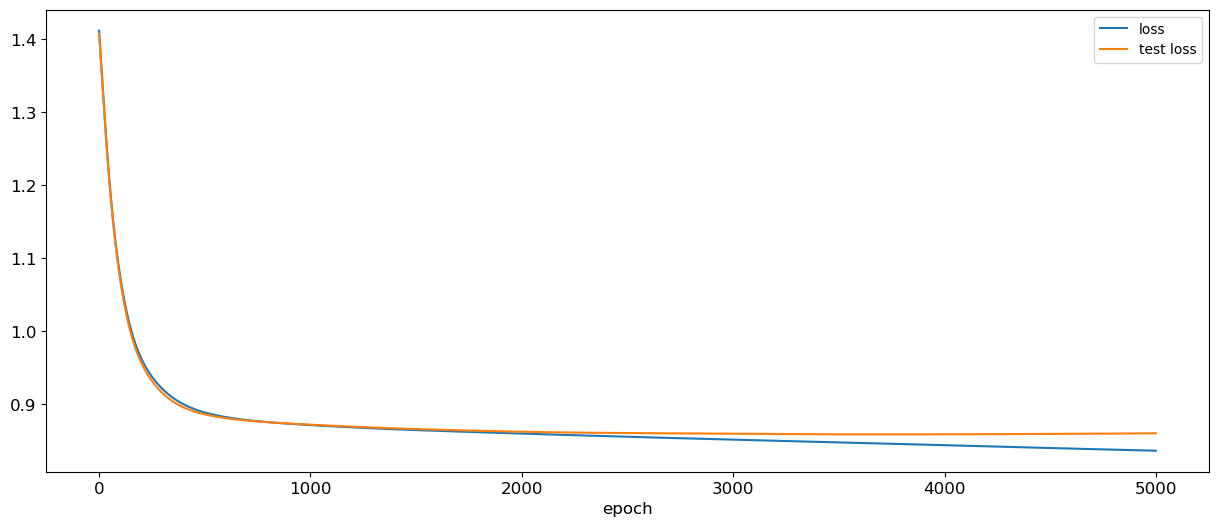

In [37]:
loss_df.plot(x='epoch',y=['loss','test loss']);

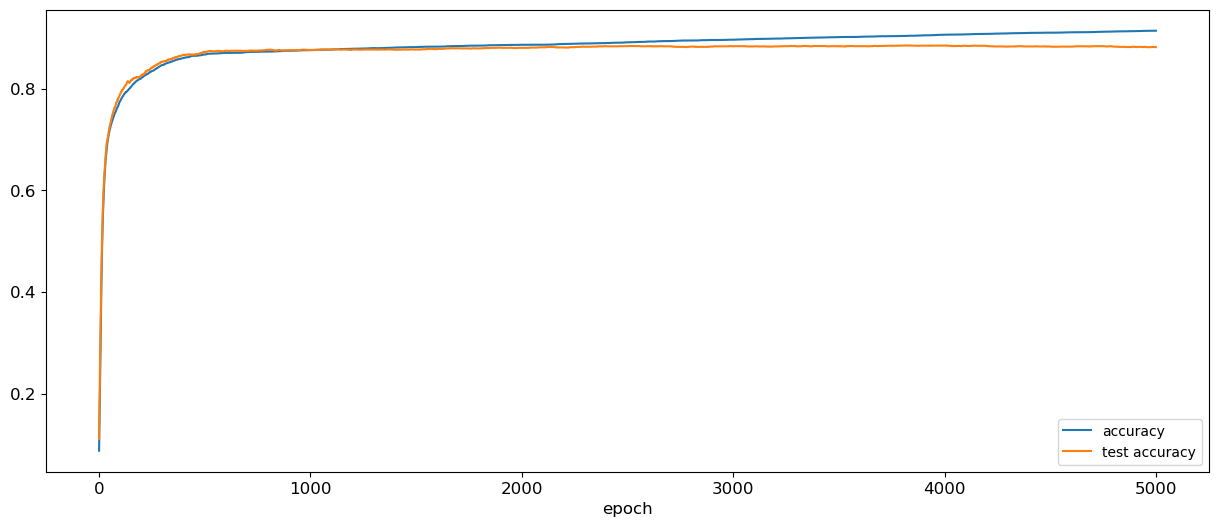

In [38]:
loss_df.plot(x='epoch',y=['accuracy','test accuracy']);